<a href="https://colab.research.google.com/github/k4404c/MAT-422/blob/main/HW3_5_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **3.5 K-Means and 3.6 Support Vector Machine**


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs

#### **K-Means**:
* k-means clustering is a popular method of vector quantization that aims to
partition n observations into k clusters in which each observation belongs
to the cluster with the nearest mean (cluster centers or cluster centroid),
serving as a prototype of the cluster.
* k-means clustering minimizes within-
cluster variances (squared Euclidean distances), but not regular Euclidean
distances.
* While k-means general converge quickly to a local optimum, the
problem is computationally diﬀicult (NP-hard)
* Given a (x1, x2, ...xn) where each observation is a d-dimensional real vector,
k-means clustering aims to partition the n observations into k(< n) sets S =
{S1, ...Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e.
variance), the squared distance of each vector from its centroid summed over
all vectors:
 * $WCSS_i = ∑_{x∈S_i}||x −μ(S_i)||^2$
* where
$μ(S_i)$ is the mean of points in $S_i$
 * $μ(S) = \frac{1}{|S|} ∑_{x∈S}x.$
* The objective is to find:
 * arg min$_S∑^k_{i=1}WCSSi$
* K-means Clustering Algorithm:
  1. Clusters the data into k groups where k is predefined.
  2. Select k points at random as cluster centers.
  3. Assign objects to their closest cluster center according to the Euclidean
distance function.
  4.  Calculate the centroid or mean of all objects in each cluster.
  5.  Repeat steps 2, 3 and 4 until the same points are assigned to each cluster
in consecutive rounds.

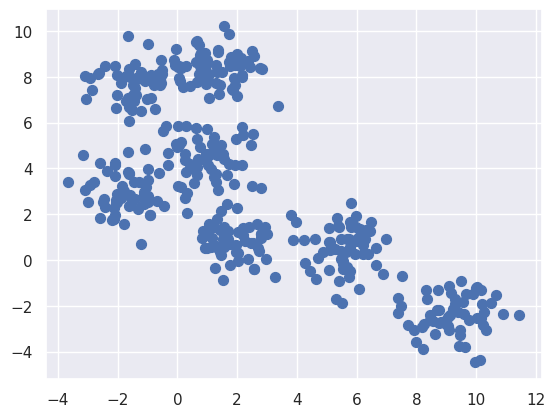

In [ ]:
sns.set()
n_clusters = 7
X, y_true = make_blobs(n_samples=400, centers=n_clusters,cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


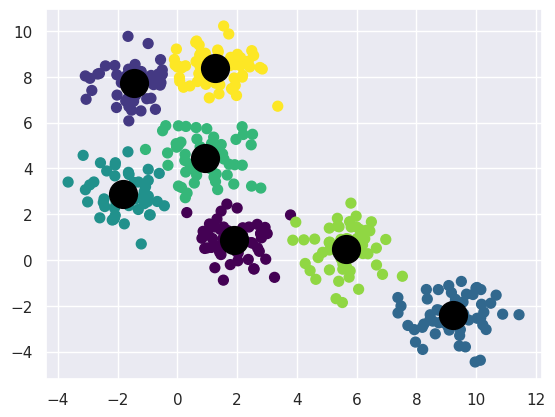

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


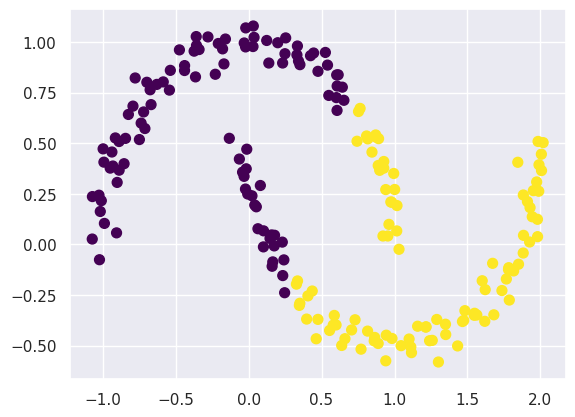

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(200, noise = 0.05, random_state = 0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


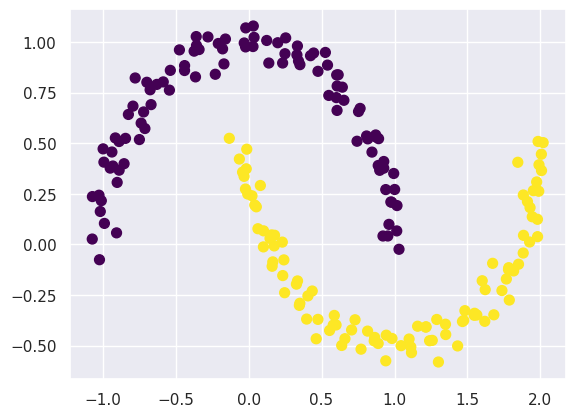

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity= 'nearest_neighbors', assign_labels= 'kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = labels, s = 50, cmap = 'viridis')

sample and prblem obtained from: https://realpython.com/k-means-clustering-python/

#### **Support Vector Machines**:
 * Support-vector machines (SVMs) are supervised learning models in machine
learning, which aim to analyze data for classification and regression analysis.
 * The objective of the support vector
machine algorithm is to find a hyperplane in a high dimensional space of the
number of features that distinctly classifies the data points.
  * An SVM maps
training examples to points in space so as to maximize the width of the gap
between the two categories.
 * A hyperplane can be written as the set of points x satisfying:
  * $w^T x − b = 0$, where w is the normal vector to the hyperplane.
* we want to have two parallel hyperplants s.t the distance between them is as large as possible.
* The region bounded by these is called the "margin" and the maximum margin hyperplane is the halfway point between them.
 * We are interested in two regions: anything on or above this
boundary is of one class, with label 1 and anything on or below this boundary
is of the other class, with label -1. The two hyperplanes can be respectively
described by the equations
  * $w^T x − b = 1,$
  * $w^T x − b = 1,$
  * We wish all data points to fall into the margin, which can be expressed as
for each i either:
* $w^T x_i − b ≥ 1$, if $y_i = 1$\
or
* $w^T x_i − b ≤ −1$, if $y_i = −1$
 * Together the two constraints that each data point must lie on the correct
side of the margin, can be rewritten as:
* $y_i(w^T x_i − b) ≥ 1$, for all $1 ≤ i ≤ n$.
 * We can put this together to get the optimization problem. The goal of the
optimization then is to minimize
  * min$_{w,b}〈λ ∥w∥^2
+ \frac{1}{n}∑
_{i=1}^n
max [0, 1 − y_i(⟨w, x_i⟩ − b)]〉$



Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629


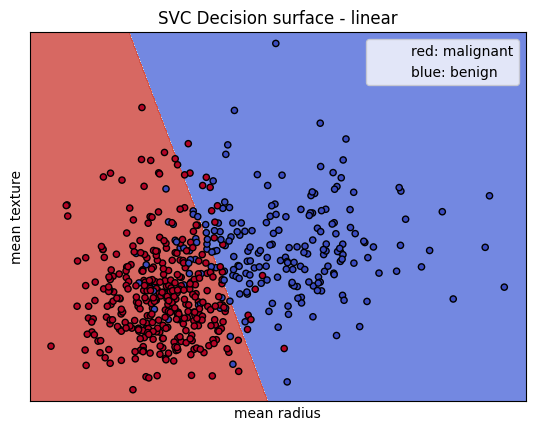

In [37]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
import pandas as pd


cancer = datasets.load_breast_cancer()

#preproccessing, gets x_train and y_train for training features and label
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109)
# 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

X = cancer.data[:,:2]
Y = cancer.target


#X = X[np.logical_or(Y==0,Y==1)]
#Y = Y[np.logical_or(Y==0,Y==1)]

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

fig, ax = plt.subplots()
title = ('SVC Decision surface - linear')

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

labels=['malignant', 'benign']
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('mean texture')
ax.set_xlabel('mean radius')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

#labels=['malignant', 'benign']
#colors=['r', 'b']

ax.legend(['red: malignant', 'blue: benign'])
plt.show()